# Project Task
Use visualization tools for describing what’s going on in these data. Possible aspects:
- How do colors behave relative to the print master?
    - on individual scales L, a, b?
    - in 3-dimensional "L-a-b" space?
- How does color dispersion behave?
    - on individual scales L, a, b?
    - in 3-dimensional "L-a-b" space?
- It may be of interst to familiarize yourself with delta-E values
- Is the behavior differntial between targets?
- Is the behavior differential between color spots?
- Is quality possibly related to the intended color?
Make use of "small multiples" in useful ways.

### Notes
L: Lightness

a: green-red component

b: blue-yellow component

For dispersion:
- compute the standard deviation for L, a and b each.
- compute the mean and the standard deviation of delta-E values between print master color and each copy for each color:
    - compute delta-E for print master and each copy of each color:
        for color in cards:
            copy in color:
                d = delta-E(printmastercolor, copy)
        mean_delta_e = mean([e1, e2, e3...])
        same for std.


In [3]:
import pandas as pd
import matplotlib. pyplot as plt
from typing import List, Tuple

In [4]:
measurements = pd.read_csv("data/LabMeasurements-Color-Card.csv", decimal=',', sep=';')
master_colors = pd.read_csv("data/MasterColorCard.csv", decimal=',', sep=';')
master_colors.set_index(['Crow', 'Ccol'], inplace=True)

In [5]:
def create_scatter_data(master_colors: pd.DataFrame,
                        measurements: pd.DataFrame,
                        color: str) -> Tuple[List,List]:
    x = []
    y = []
    for row in range(1,9):
        for col in range(1,9):
            x += [master_colors.loc[(row, col)][color]]*546
            y += measurements[color+str(row)+str(col)].to_list()
    return x, y


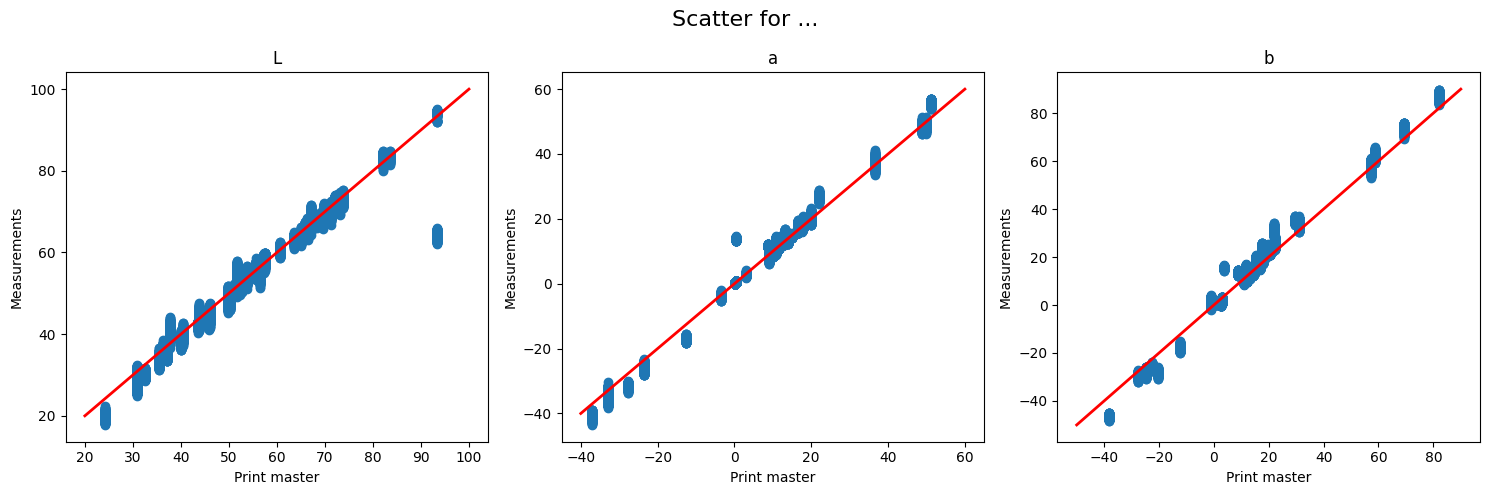

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, color in enumerate(["L", "a", "b"]):
    x, y = create_scatter_data(master_colors, measurements, color)
    axes[i].scatter(x, y)
    if color == "L":
        axes[i].plot([20, 100], [20, 100], color='red', linestyle='-', linewidth=2)
    elif color == "a":
        axes[i].plot([-40, 60], [-40, 60], color='red', linestyle='-', linewidth=2)
    else:
        axes[i].plot([-50, 90], [-50, 90], color='red', linestyle='-', linewidth=2)
    axes[i].set_title(f"{color}")
    axes[i].set_xlabel("Print master")
    axes[i].set_ylabel("Measurements")

fig.suptitle("Scatter for ...", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import colorspacious as cs

fig, axes = plt.subplots(8, 8, figsize=(24, 24))

max_error = np.max(delta_e_values)

j = 0
for row in range(1, 9):
    for col in range(1, 9):
        ax = axes[row - 1, col - 1]
        spot = row * 10 + col

        if spot in [11, 18, 81, 88]:
            circle = patches.Circle((0.0, 0.0), 10, facecolor='gray', edgecolor='black')
            ax.add_patch(circle)
            ax.set_aspect('equal')
            ax.set_xlim([-10.5, 10.5])
            ax.set_ylim([-10.5, 10.5])
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
            continue

        L_master = master_colors.loc[row, col]['L']
        a_master = master_colors.loc[row, col]['a']
        b_master = master_colors.loc[row, col]['b']
        master_color = cs.cspace_convert([L_master, a_master, b_master], "CIELab", "sRGB1")
        master_color = np.clip(master_color, 0, 1)
        ax.set_facecolor(master_color)

        hist_color = 'white' if L_master < 47 else 'black'
        # Change histogram to boxplot, centered
        ax.boxplot(delta_e_values[:, j], patch_artist=True, boxprops=dict(facecolor=hist_color, color='black', linewidth=1.5), medianprops=dict(color='red'), widths=0.5, positions=[0.5])

        ax.set_xlim([0, 1])  # Center the boxplot
        if spot != 34:
            ax.set_ylim([0, 10])
        ax.set_ylabel('Delta E Values')
        ax.set_xlabel('')
        ax.set_title(str(spot))
        j += 1

plt.tight_layout()
plt.savefig('figures/delta_e_boxplots.png')
